# Modelos lineales

In [ ]:
!pip install wooldridge yellowbrick
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import wooldridge as wd

In [ ]:
df = pd.read_csv('')

In [ ]:
x = df[['educ', 'exper', 'married', 'female', 'tenure']]
y = df['wage']

In [ ]:
wage = wd.data('wage1')[['wage', 'educ', 'exper', 'married', 'female', 'tenure']]

In [ ]:
wage.head()

,wage,educ,exper,married,female,tenure
0,3.10,11,2,0,1,0
1,3.24,12,22,1,1,2
2,3.00,11,2,0,0,0
3,6.00,8,44,1,0,28
4,5.30,12,7,1,0,2


In [ ]:
X = wage.drop(columns='wage')
y = wage['wage']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

$$S_{linear} = \sum_{i=1}^n(Y_i - b_kX_{1i} - ... - b_kX_{ki})^2$$
$$S_{Ridge} = \sum_{i=1}^n(Y_i - b_kX_{1i} - ... - b_kX_{ki})^2 + \lambda_{Ridge} \sum_{j=1}^kb_j^2$$
$$S_{Lasso} = \sum_{i=1}^n(Y_i - b_kX_{1i} - ... - b_kX_{ki})^2+ \lambda_{Lasso} \sum_{j=1}^k|b_j|$$
$$S_{en} = \sum_{i=1}^n(Y_i - b_kX_{1i} - ... - b_kX_{ki})^2 + \alpha  \lambda_1  \sum_{j=1}^k|b_j|
+ 0.5  \alpha  (1 - \lambda_1)  \sum_{j=1}^kb_j^2$$

## Regresión lineal

In [ ]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print(mean_squared_error(pred_train, y_train, squared=True))
print(mean_squared_error(pred_train, y_train, squared=False))
print('***' * 10)
print(mean_squared_error(pred_test, y_test, squared=True))
print(mean_squared_error(pred_test, y_test, squared=False))

9.318379622327612
3.0526021067816242
******************************
5.913354414929687
2.431738969324152


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


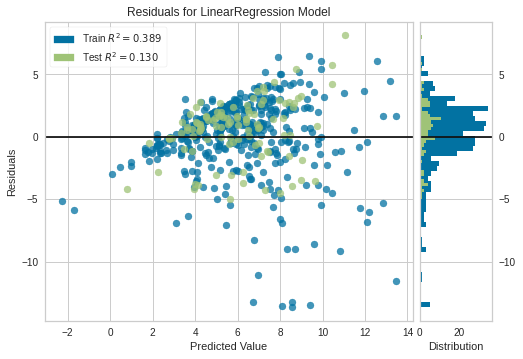

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(lreg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

## Regresión Ridge

In [ ]:
lrid = Ridge()
lrid.fit(X_train, y_train)
pred_train = lrid.predict(X_train)
pred_test = lrid.predict(X_test)

print(mean_squared_error(pred_train, y_train, squared=True))
print(mean_squared_error(pred_train, y_train, squared=False))
print('***' * 10)
print(mean_squared_error(pred_test, y_test, squared=True))
print(mean_squared_error(pred_test, y_test, squared=False))

9.31846480515549
3.0526160592441838
******************************
5.907225402766926
2.4304784308376255


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


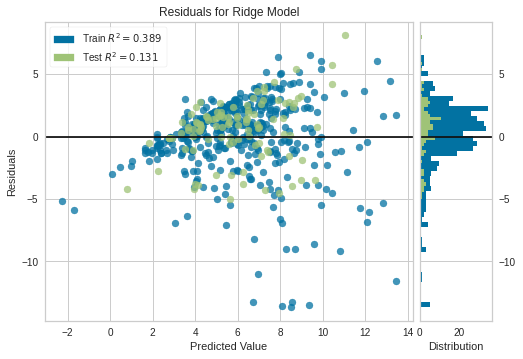

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(lrid)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Regresión Lasso

In [ ]:
las = Lasso()
las.fit(X_train, y_train)
pred_train = las.predict(X_train)
pred_test = las.predict(X_test)

print(mean_squared_error(pred_train, y_train, squared=True))
print(mean_squared_error(pred_train, y_train, squared=False))
print('***' * 10)
print(mean_squared_error(pred_test, y_test, squared=True))
print(mean_squared_error(pred_test, y_test, squared=False))

10.43205757536557
3.2298695910772577
******************************
6.131428464552399
2.476172139523502


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


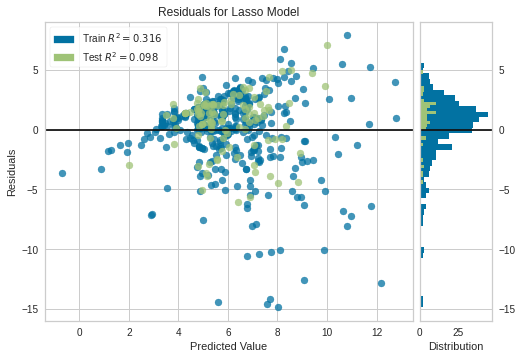

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(las)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

## Elastic Net

In [ ]:
len = ElasticNet()
len.fit(X_train, y_train)
pred_train = len.predict(X_train)
pred_test = len.predict(X_test)

print(mean_squared_error(pred_train, y_train, squared=True))
print(mean_squared_error(pred_train, y_train, squared=False))
print('***' * 10)
print(mean_squared_error(pred_test, y_test, squared=True))
print(mean_squared_error(pred_test, y_test, squared=False))

10.357760927912278
3.218347546165932
******************************
6.163309381183872
2.4826013335177017


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


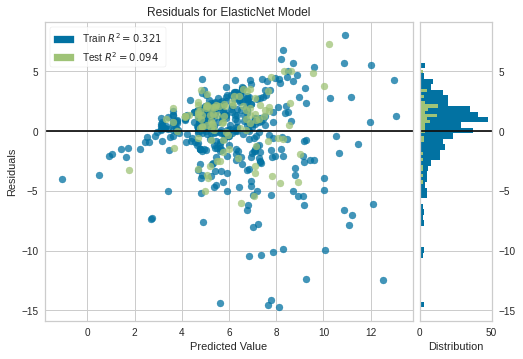

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(len)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [ ]:
def res_table(X_test, y_test, *models):

  dic = {'model':[],
         'mse': [],
         'mae': [],
         'rmse': []}
  for model in models:
    pred_test = model.predict(X_test)
    dic['model'].append(model)
    dic['mse'].append(mean_squared_error(pred_test, y_test))
    dic['rmse'].append(mean_squared_error(pred_test, y_test, squared=False))
    dic['mae'].append(mean_absolute_error(pred_test, y_test))

  return pd.DataFrame(dic)


In [ ]:
res_table(X_test, y_test, lreg, lrid, las, len)

,model,mse,mae,rmse
0,LinearRegression(),5.913354,1.915258,2.431739
1,Ridge(),5.907225,1.914258,2.430478
2,Lasso(),6.131428,2.038103,2.476172
3,ElasticNet(),6.163309,2.033569,2.482601


# Modelos lineales con validación cruzada

## Regresión Ridge

In [ ]:
param_ridge = {'alpha': np.arange(0, 10, 0.1)}

ridge_cv = GridSearchCV(Ridge(), param_grid=param_ridge, cv=3, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_cv.best_params_

{'alpha': 1.5}

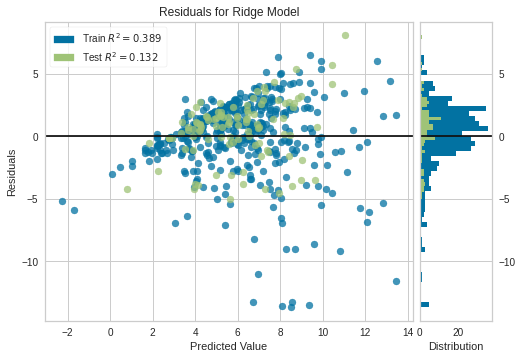

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(Ridge(**ridge_cv.best_params_))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

## Lasso

In [ ]:
param_lasso = {'alpha': np.arange(0, 10, 0.1)}

lasso_cv = GridSearchCV(Lasso(), param_grid=param_lasso, cv=3, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.477e+03, tolerance: 4.781e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_cv.best_params_

{'alpha': 0.0}

/usr/local/lib/python3.9/dist-packages/yellowbrick/base.py:390: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator.fit(X, y, **kwargs)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.957e+03, tolerance: 6.403e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


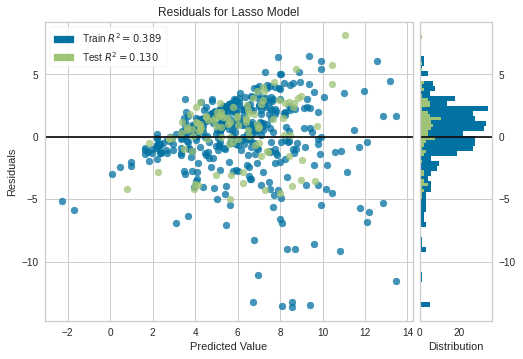

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(Lasso(**lasso_cv.best_params_))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

## Elastic Net

In [ ]:
param_en = {'alpha': np.arange(0.1, 10, 0.1),
            'l1_ratio': np.arange(0.1, 1.1, 0.1)}

en_cv = GridSearchCV(ElasticNet(), param_grid=param_en, cv=3, scoring='neg_mean_squared_error')
en_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [ ]:
en_cv.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

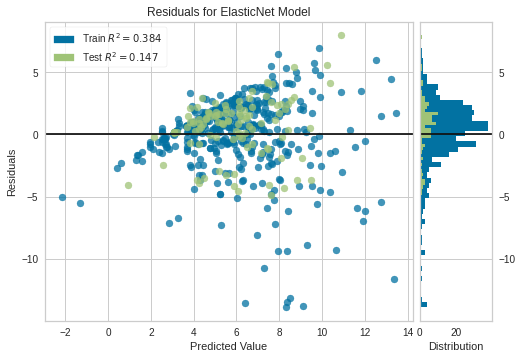

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(ElasticNet(**en_cv.best_params_))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [ ]:
info = res_table(X_test, y_test, lreg, lrid, ridge_cv, las, lasso_cv, len, en_cv)

In [ ]:
info.sort_values(by='mse')

,model,mse,mae,rmse
6,"GridSearchCV(cv=3, estimator=ElasticNet(),\n ...",5.801867,1.913421,2.408707
2,"GridSearchCV(cv=3, estimator=Ridge(),\n ...",5.904269,1.913764,2.429870
1,Ridge(),5.907225,1.914258,2.430478
4,"GridSearchCV(cv=3, estimator=Lasso(),\n ...",5.913354,1.915258,2.431739
0,LinearRegression(),5.913354,1.915258,2.431739
3,Lasso(),6.131428,2.038103,2.476172
5,ElasticNet(),6.163309,2.033569,2.482601


# Escalamiento de los datos

In [ ]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Ridge escalado

In [ ]:
param_ridge = {'alpha': np.arange(0, 10, 0.1)}

ridge_cv_sc = GridSearchCV(Ridge(), param_grid=param_ridge, cv=3, scoring='neg_mean_squared_error')
ridge_cv_sc.fit(X_train_sc, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

## Lasso escalado

In [ ]:
param_lasso = {'alpha': np.arange(0, 10, 0.1)}

lasso_cv_sc = GridSearchCV(Lasso(), param_grid=param_ridge, cv=3, scoring='neg_mean_squared_error')
lasso_cv_sc.fit(X_train_sc, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.477e+03, tolerance: 4.781e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error')

## ElasticNet escalado

In [ ]:
param_en = {'alpha': np.arange(0.1, 10, 0.1),
            'l1_ratio': np.arange(0.1, 1.1, 0.1)}

en_cv_sc = GridSearchCV(ElasticNet(), param_grid=param_en, cv=3, scoring='neg_mean_squared_error')
en_cv_sc.fit(X_train_sc, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

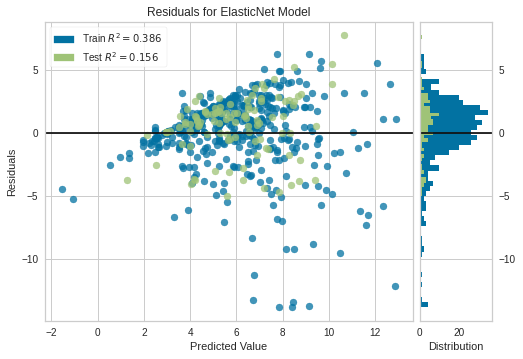

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(ElasticNet(**en_cv_sc.best_params_))

visualizer.fit(X_train_sc, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_sc, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [ ]:
info1 = res_table(X_test, y_test, lreg, lrid, ridge_cv, las, lasso_cv, len, en_cv)
info1

,model,mse,mae,rmse
0,LinearRegression(),5.913354,1.915258,2.431739
1,Ridge(),5.907225,1.914258,2.430478
2,"GridSearchCV(cv=3, estimator=Ridge(),\n ...",5.904269,1.913764,2.429870
3,Lasso(),6.131428,2.038103,2.476172
4,"GridSearchCV(cv=3, estimator=Lasso(),\n ...",5.913354,1.915258,2.431739
5,ElasticNet(),6.163309,2.033569,2.482601
6,"GridSearchCV(cv=3, estimator=ElasticNet(),\n ...",5.801867,1.913421,2.408707


In [ ]:
info2 = res_table(X_test_sc, y_test, ridge_cv_sc, lasso_cv_sc, en_cv_sc)
info2

,model,mse,mae,rmse
0,"GridSearchCV(cv=3, estimator=Ridge(),\n ...",5.913354,1.915258,2.431739
1,"GridSearchCV(cv=3, estimator=Lasso(),\n ...",5.913354,1.915258,2.431739
2,"GridSearchCV(cv=3, estimator=ElasticNet(),\n ...",5.739109,1.904194,2.395644


In [ ]:
tabla_res = pd.concat([info1, info2], axis=0, ignore_index=True)
tabla_res.sort_values(by='mse')

,model,mse,mae,rmse
9,"GridSearchCV(cv=3, estimator=ElasticNet(),\n ...",5.739109,1.904194,2.395644
6,"GridSearchCV(cv=3, estimator=ElasticNet(),\n ...",5.801867,1.913421,2.408707
2,"GridSearchCV(cv=3, estimator=Ridge(),\n ...",5.904269,1.913764,2.429870
1,Ridge(),5.907225,1.914258,2.430478
4,"GridSearchCV(cv=3, estimator=Lasso(),\n ...",5.913354,1.915258,2.431739
7,"GridSearchCV(cv=3, estimator=Ridge(),\n ...",5.913354,1.915258,2.431739
0,LinearRegression(),5.913354,1.915258,2.431739
8,"GridSearchCV(cv=3, estimator=Lasso(),\n ...",5.913354,1.915258,2.431739
3,Lasso(),6.131428,2.038103,2.476172
5,ElasticNet(),6.163309,2.033569,2.482601
